Assignment 5
Redoing Colabs from:
https://www.tensorflow.org/tutorials/quickstart/advanced (Links to an external site.)

 (Links to an external site.)https://www.tensorflow.org/tutorials/keras/regression (Links to an external site.)

 (Links to an external site.)https://www.tensorflow.org/tutorials/keras/classification (Links to an external site.) (Links to an external site.)

https://www.tensorflow.org/tutorials/keras/text_classification_with_hub (Links to an external site.)

 (Links to an external site.)

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit (Links to an external site.) (Links to an external site.)

https://www.tensorflow.org/tutorials/keras/save_and_load (Links to an external site.) (Links to an external site.)

https://www.tensorflow.org/tutorials/load_data/tfrecord (Links to an external site.) (Links to an external site.)

 (Links to an external site.)

Basics of tensors ; https://www.tensorflow.org/tutorials/customization/basics

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

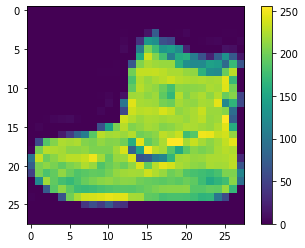

In [0]:
plt.figure()
plt.imshow(train_images[2)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

In [0]:
test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4963 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3743 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3140 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2469 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3395 - accuracy: 0.8783

Test accuracy: 0.8783000111579895


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
predictions[0]

array([2.5559935e-05, 1.7077607e-10, 7.3423547e-07, 8.4373042e-08,
       4.3226891e-08, 1.8151676e-03, 4.2772986e-06, 4.8555513e-03,
       1.4753745e-07, 9.9329847e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

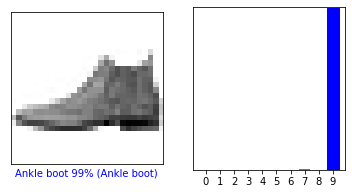

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

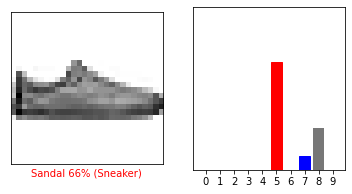

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [0]:
# # Plot the first X test images, their predicted labels, and the true labels.
# # correct predictions blue and incorrect = red.
# num_rows = 5
# num_cols = 3
# num_images = num_rows*num_cols
# plt.figure(figsize=(2*2*num_cols, 2*num_rows))
# for i in range(num_images):
#   plt.subplot(num_rows, 2*num_cols, 2*i+1)
#   plot_image(i, predictions[i], test_labels, test_images)
#   plt.subplot(num_rows, 2*num_cols, 2*i+2)
#   plot_value_array(i, predictions[i], test_labels)
# plt.tight_layout()
# plt.show()

In [0]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.6382303e-06 3.8426391e-15 9.9894613e-01 3.0912582e-12 1.0432522e-03
  1.5332062e-11 6.9775824e-06 1.0498680e-19 2.5538502e-10 7.5024893e-14]]


In [0]:
# plot_value_array(1, predictions_single[0], test_labels)
# _ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

2